# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing dataset

In [75]:
df = pd.read_csv(r"C:\Users\61405\Documents\Capstone\insurance_dataset.csv")
df.head(10)

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
5,55,female,36.41,0,yes,northeast,None,None,Never,Student,Basic,11896.836613
6,64,female,20.12,2,no,northeast,High blood pressure,High blood pressure,Never,Blue collar,Basic,9563.655011
7,53,male,30.51,4,no,southeast,Heart disease,High blood pressure,Rarely,Student,Standard,15845.293730
8,40,female,44.93,2,yes,northeast,None,Diabetes,Occasionally,Unemployed,Basic,14036.544129
9,22,female,32.13,5,yes,northeast,Diabetes,None,Never,Student,Basic,13669.577830


# Dataset Glossary (Column-Wise)

<h5>Age:</h5>	The age of the customer.<br>
<h5>Gender:</h5>	Gender of individual.<br>
<h5>BMI:</h5>	Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
<h5>Children:</h5>	The number of children the customer has.<br>
<h5>Smoker:</h5>	Whether or not the customer is a smoker.<br>
<h5>Region:</h5>	The region the customer lives in.<br>
<h5>Medical History:</h5>	The individuals personal medical history.<br>
<h5>Family Medical History:</h5>	The individuals family medical history.<br>
<h5>Exercise Frequency:</h5>	How often the individual exercises.<br>
<h5>Occupation:</h5>	Type of work they're in.<br>
<h5>Coverage Level:</h5>	Refers to the insurance plan's different tiers of insurance coverage.<br>
<h5>Charges:</h5>	The insurance charges for the customer.<br>

# Dropping unneccessary columns
<h5>Index:</h5> No calculable value to the dataset 

In [3]:
# df = df.drop(['index'], axis=1)
# df.head()

# Getting number of rows and columns

In [4]:
df.shape

(1000000, 12)

# Check for missing values

In [5]:
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

<h5>No missing values to deal with</h5><br>

# Overhead view of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [7]:
df.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [8]:
df.nunique()

age                            48
gender                          2
bmi                          3201
children                        6
smoker                          2
region                          4
medical_history                 4
family_medical_history          4
exercise_frequency              4
occupation                      4
coverage_level                  3
charges                   1000000
dtype: int64

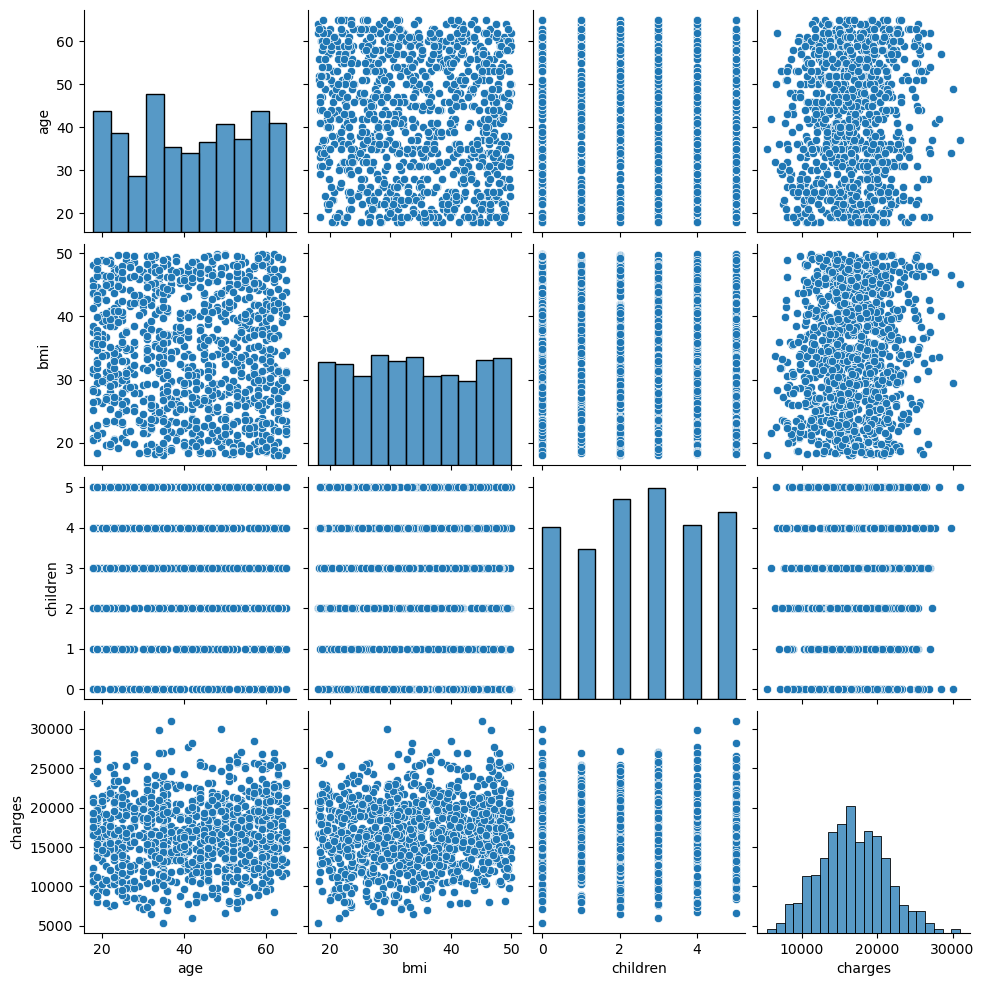

In [10]:
sns.pairplot(df.sample(1000))

<h3>Evaluation of the pair plot</h3><br>
<h5>From the histograms of Age and BMI - you can see the data is uniform in nature.<br>
Children is categorical and charges is fairly normally distributed</h5>

C:\Users\61405\AppData\Local\Temp\ipykernel_8512\1680335478.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], ax=axs[0])


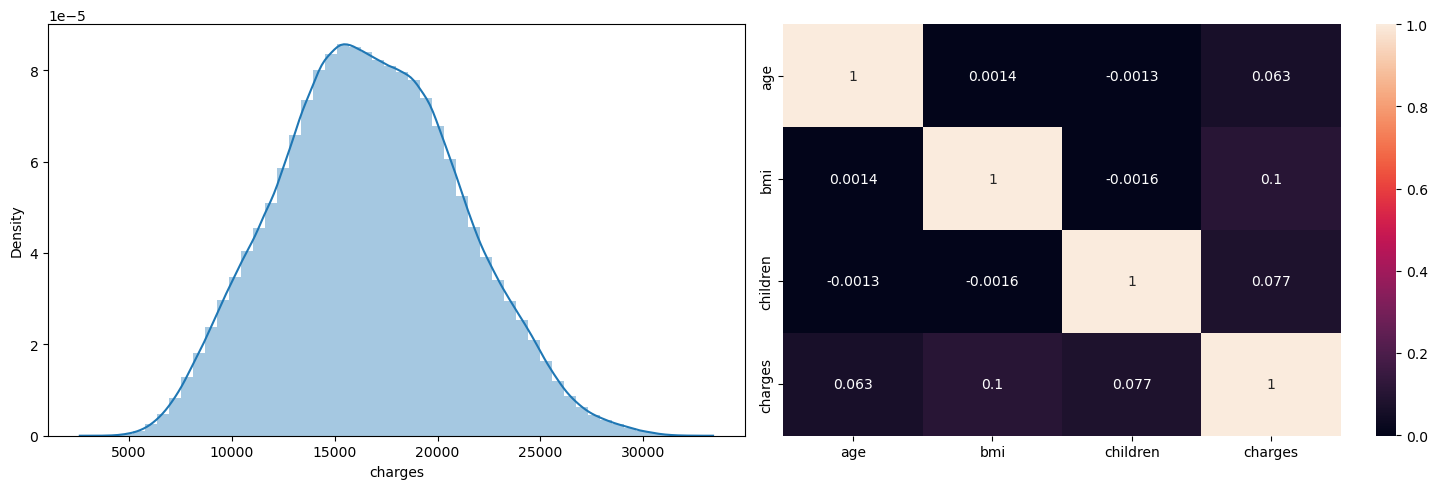

In [11]:
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(df['charges'], ax=axs[0])
sns.heatmap(df.corr(), ax=axs[1], annot=True)
fig.tight_layout()

# Modelling the raw data

In [12]:
y, X = dmatrices('charges ~ age + bmi + children + smoker + gender + region + occupation + medical_history + family_medical_history + exercise_frequency', data=df, return_type='dataframe')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train) 

y_hat_train = lm.predict(X_train)
y_hat_test = lm.predict(X_test)

In [15]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [16]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 4305117.228610767
Test Mean Squared Error: 4302655.687244177


In [17]:
train_mse/test_mse

1.00057209815182

In [18]:
cdf = pd.DataFrame(lm.coef_[0], index=X_train.columns, columns=['coefficients'])
cdf

,coefficients
Intercept,0.000000
smoker[T.yes],4994.282341
gender[T.male],998.592764
region[T.northwest],-705.846004
region[T.southeast],-510.017884
region[T.southwest],-803.054318
occupation[T.Student],-994.095401
occupation[T.Unemployed],-1502.489250
occupation[T.White collar],509.609559
medical_history[T.Heart disease],3006.954188


In [19]:
X_train = sm.add_constant(X_train)
sm_ols = linear_model.OLS(y_train, X_train) 
sm_model = sm_ols.fit()

<h3>Capture the Adjusted R-squared</h3>

In [20]:
adjusted_r_squared = sm_model.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.7796010024174239


<h5>This is a good Adjusted R-squared as it's between 0.5 and 0.99. This means the the variables are statistically significant</h5><br>

In [21]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.238e+05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:58:15   Log-Likelihood:            -6.3396e+06
No. Observations:              700000   AIC:                         1.268e+07
Df Residuals:                  699979   BIC:                         1.268e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      1.282e+04     16.193    791.695      0.000    1.28e+04    1.29e+04
smoker[T.yes]                                  4994.2823      4.960   1006.899      0.000    4984.561    5004.004
gender[T.male]                                  998.5928      4.960    201.328      0.000     988.871    1008.314
region[T.northwest]                            -705.8460      7.013   -100.650      0.000    -719.591    -692.101
region[T.southeast]                            -510.0179      7.014    -72.715      0.000    -523.765    -496.271
region[T.southwest]                            -803.0543      7.011   -114.536      0.000    -816.796    -789.312
occupation[T.Student]                          -994.0954      7.013   -141.744      0.000   -1007.841    -980.350
occupation[T.Unemployed]                      -1502.4893      7.009   -214.358      0.000   -1516.227   -1488.751
occupation[T.White collar]                      509.6096      7.019     72.608      0.000     495.853     523.366
medical_history[T.Heart disease]               3006.9542      7.017    428.495      0.000    2993.200    3020.708
medical_history[T.High blood pressure]        -1001.3597      7.023   -142.584      0.000   -1015.124    -987.595
medical_history[T.None]                       -2001.5871      7.014   -285.364      0.000   -2015.335   -1987.840
family_medical_history[T.Heart disease]        3007.4364      7.016    428.639      0.000    2993.685    3021.188
family_medical_history[T.High blood pressure]  -993.4074      7.015   -141.620      0.000   -1007.156    -979.659
family_medical_history[T.None]                -1993.5651      7.016   -284.134      0.000   -2007.317   -1979.813
exercise_frequency[T.Never]                   -1995.3879      7.016   -284.402      0.000   -2009.139   -1981.637
exercise_frequency[T.Occasionally]             -999.0550      7.013   -142.463      0.000   -1012.800    -985.310
exercise_frequency[T.Rarely]                  -1501.1332      7.011   -214.123      0.000   -1514.874   -1487.393
age                                              19.9867      0.179    111.654      0.000      19.636      20.338
bmi                                              50.2207      0.269    186.976      0.000      49.694      50.747
children                                        200.1164      1.453    137.758      0.000     197.269     202.964
==============================================================================
Omnibus:                  5124981.767   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67069.452
Skew:                           0.236   Prob(JB):                         0.00
Kurtosis:                      

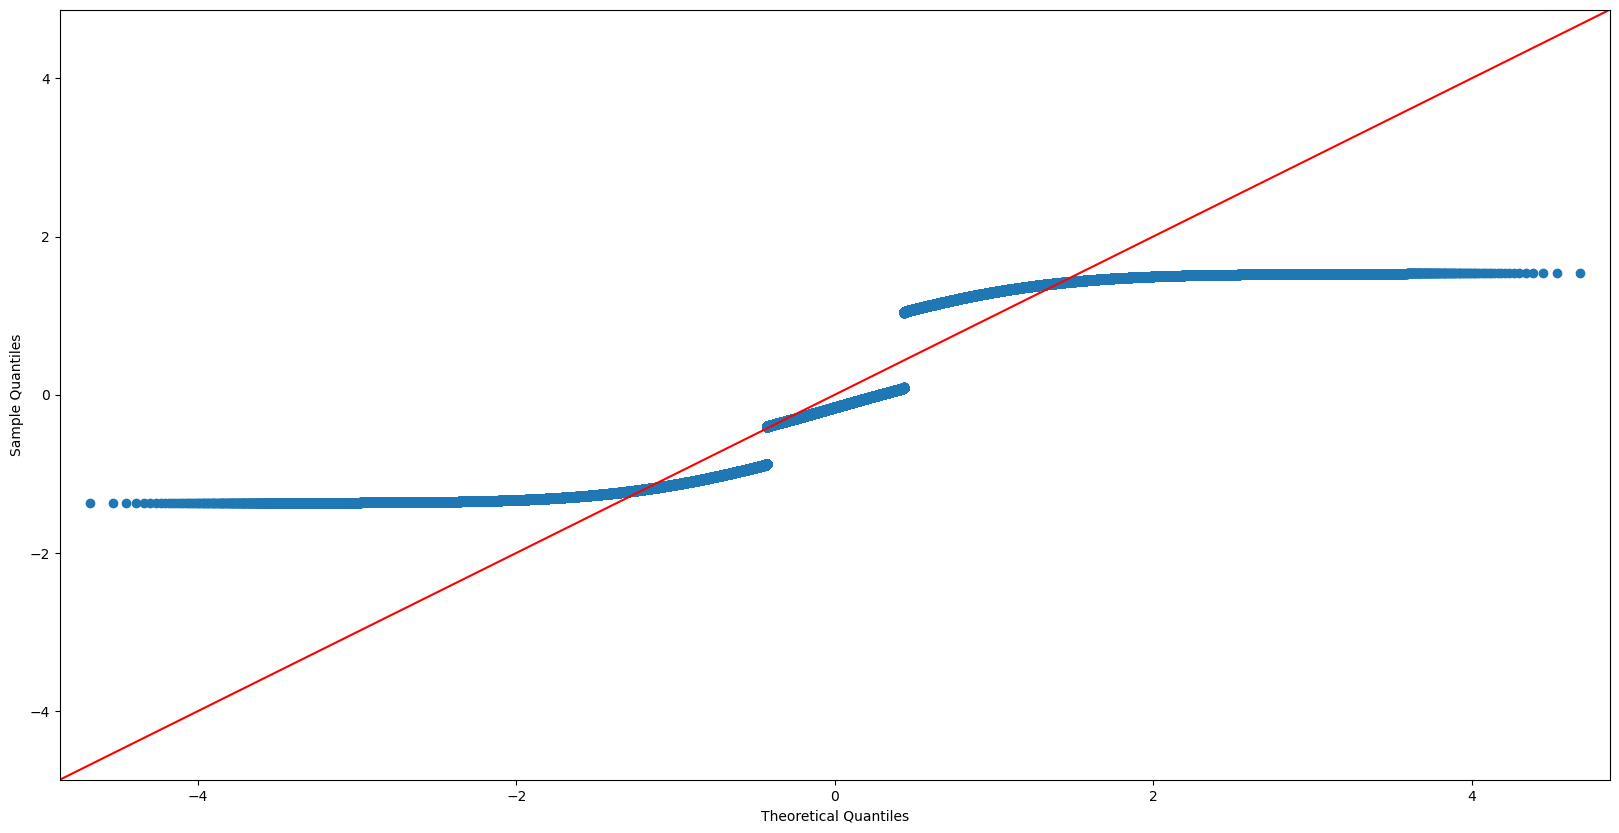

In [22]:
fig = sm.qqplot(sm_model.resid, line='45', fit=True)

<h3>This QQ plot is strange. There are strong outliers and is showing uniformity in the data</h3>

# Data cleaning and preprocessing

In [23]:
df.duplicated().sum()

0

<h3>Creating dummies for categorical variables</h3>

In [24]:
smoker_dummies = pd.get_dummies(df.smoker,drop_first=True)
smoker_dummies.rename(columns = {'no':'smoker_no', 'yes':'smoker_yes'}, inplace = True)
merged = pd.concat([df, smoker_dummies], axis='columns')
merged.drop('smoker', axis=1, inplace=True)
gender_dummies = pd.get_dummies(merged.gender,drop_first=True)
gender_dummies.rename(columns = {'male':'gender_male', 'female':'gender_female'}, inplace = True)
merged = pd.concat([merged, gender_dummies], axis='columns')

region_dummies = pd.get_dummies(merged.region,drop_first=True)
region_dummies.rename(columns = {'northeast':'region_northeast', 'northwest':'region_northwest', 'southeast':'region_southeast', 'southwest':'region_southwest'}, inplace = True)
merged = pd.concat([merged, region_dummies], axis='columns')

occupation_dummies = pd.get_dummies(merged.occupation,drop_first=True)
occupation_dummies.rename(columns = {'Unemployed':'occupation_Unemployed', 'Student':'occupation_Student', 'Blue collar':'occupation_Blue_collar', 'White collar':'occupation_White_collar'}, inplace = True)
merged = pd.concat([merged, occupation_dummies], axis='columns')

exercise_frequency_ord_mapping = {'Never': 0,'Rarely': 1,'Occasionally': 2 , 'Frequently': 3}
merged['exercise_frequency_ord'] = merged.exercise_frequency.map(exercise_frequency_ord_mapping)
coverage_level_ord_mapping = {'Basic': 0,'Standard': 1,'Premium': 2}
merged['coverage_level_ord'] = merged.coverage_level.map(coverage_level_ord_mapping)
medical_history_ord_mapping = {'None': 0,'Diabetes': 1,'High blood pressure': 2, 'Heart disease':3}
merged['medical_history_ord'] = merged.medical_history.map(medical_history_ord_mapping)
merged['family_medical_history_ord'] = merged.family_medical_history.map(medical_history_ord_mapping)
merged.drop(['occupation','region','gender','exercise_frequency','coverage_level','medical_history','family_medical_history'], axis = 1, inplace = True)

In [25]:
merged.dtypes

age                             int64
bmi                           float64
children                        int64
charges                       float64
smoker_yes                      uint8
gender_male                     uint8
region_northwest                uint8
region_southeast                uint8
region_southwest                uint8
occupation_Student              uint8
occupation_Unemployed           uint8
occupation_White_collar         uint8
exercise_frequency_ord          int64
coverage_level_ord              int64
medical_history_ord             int64
family_medical_history_ord      int64
dtype: object

In [26]:
merged.head()

,age,bmi,children,charges,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,occupation_Student,occupation_Unemployed,occupation_White_collar,exercise_frequency_ord,coverage_level_ord,medical_history_ord,family_medical_history_ord
0,46,21.45,5,20460.307669,1,1,0,1,0,0,0,0,0,2,1,0
1,25,25.38,2,20390.899218,1,0,1,0,0,0,0,1,2,2,1,2
2,38,44.88,2,20204.476302,1,1,0,0,1,0,0,0,2,2,0,2
3,25,19.89,0,11789.029843,0,1,1,0,0,0,0,1,1,1,0,1
4,49,38.21,3,19268.309838,1,1,1,0,0,0,0,1,1,1,1,2


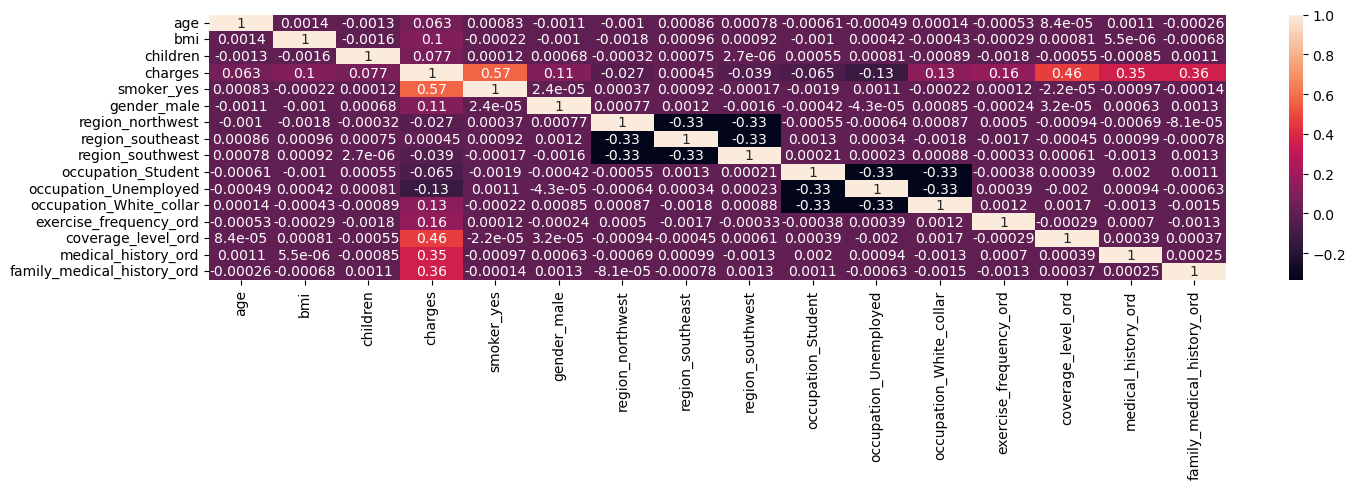

In [27]:
fig, axs = plt.subplots(1, figsize=[15,5])
sns.heatmap(merged.corr(), annot=True)
fig.tight_layout()

<h4>Heatmap shows a good correlation with charges and smokers. There is medium low correlation between charges and coverage, medical history and family medical history</h4><br>

In [28]:
X1= merged.drop(['charges'], axis=1)
y1= merged[['charges']]

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [30]:
lm.fit(X1_train, y1_train) 

y1_hat_train = lm.predict(X1_train)
y1_hat_test = lm.predict(X1_test)

In [31]:
train_residuals = y1_hat_train - y1_train
test_residuals = y1_hat_test - y1_test

# Train/Test mean squared error raw data

In [32]:
train1_mse = mean_squared_error(y1_train, y1_hat_train)
test1_mse = mean_squared_error(y1_test, y1_hat_test)
print('Train Mean Squared Error:', train1_mse)
print('Test Mean Squared Error:', test1_mse)

Train Mean Squared Error: 2255545.568218658
Test Mean Squared Error: 2259460.979874397


In [34]:
X1const_train = sm.add_constant(X1_train)
sm1_ols = linear_model.OLS(y1_train, X1const_train) 
sm1_model = sm1_ols.fit()
X1_train.head()

,age,bmi,children,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,occupation_Student,occupation_Unemployed,occupation_White_collar,exercise_frequency_ord,coverage_level_ord,medical_history_ord,family_medical_history_ord
506532,61,23.92,1,1,1,1,0,0,0,0,1,0,0,3,0
327991,46,29.45,1,1,1,0,0,0,0,0,0,3,2,0,1
715937,49,37.95,1,1,0,0,0,0,0,0,1,0,2,1,3
860726,46,37.16,5,1,0,0,0,1,0,0,0,0,0,3,3
78617,35,37.10,0,1,1,0,0,1,0,0,1,0,0,3,3


<h3>Captured R-squared with dummies</h3>

In [35]:
adjusted_r_squared = sm1_model.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.8845289443002112


<h4>R2 has significant improvement from the raw data</h4><br>

In [36]:
sm1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 3.575e+05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:58:23   Log-Likelihood:            -6.1134e+06
No. Observations:              700000   AIC:                         1.223e+07
Df Residuals:                  699984   BIC:                         1.223e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4009.5056     11.439    350.518      0.000    3987.086    4031.925
age                           19.9744      0.130    154.162      0.000      19.720      20.228
bmi                           50.2184      0.194    258.307      0.000      49.837      50.599
children                     199.7728      1.051    189.993      0.000     197.712     201.834
smoker_yes                  5008.5451      3.590   1395.074      0.000    5001.508    5015.582
gender_male                  999.8480      3.590    278.496      0.000     992.811    1006.885
region_northwest            -702.6941      5.076   -138.433      0.000    -712.643    -692.745
region_southeast            -498.8098      5.077    -98.253      0.000    -508.760    -488.859
region_southwest            -797.7595      5.075   -157.195      0.000    -807.706    -787.813
occupation_Student          -992.2284      5.076   -195.461      0.000   -1002.178    -982.279
occupation_Unemployed      -1487.4673      5.073   -293.187      0.000   -1497.411   -1477.524
occupation_White_collar      507.2595      5.080     99.850      0.000     497.302     517.217
exercise_frequency_ord       650.7936      1.606    405.262      0.000     647.646     653.941
coverage_level_ord          2500.3284      2.198   1137.474      0.000    2496.020    2504.637
medical_history_ord         1401.3615      1.604    873.646      0.000    1398.218    1404.505
family_medical_history_ord  1402.3134      1.606    873.407      0.000    1399.167    1405.460
==============================================================================
Omnibus:                    40088.113   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42402.755
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                       2.607   Cond. No.                         367.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

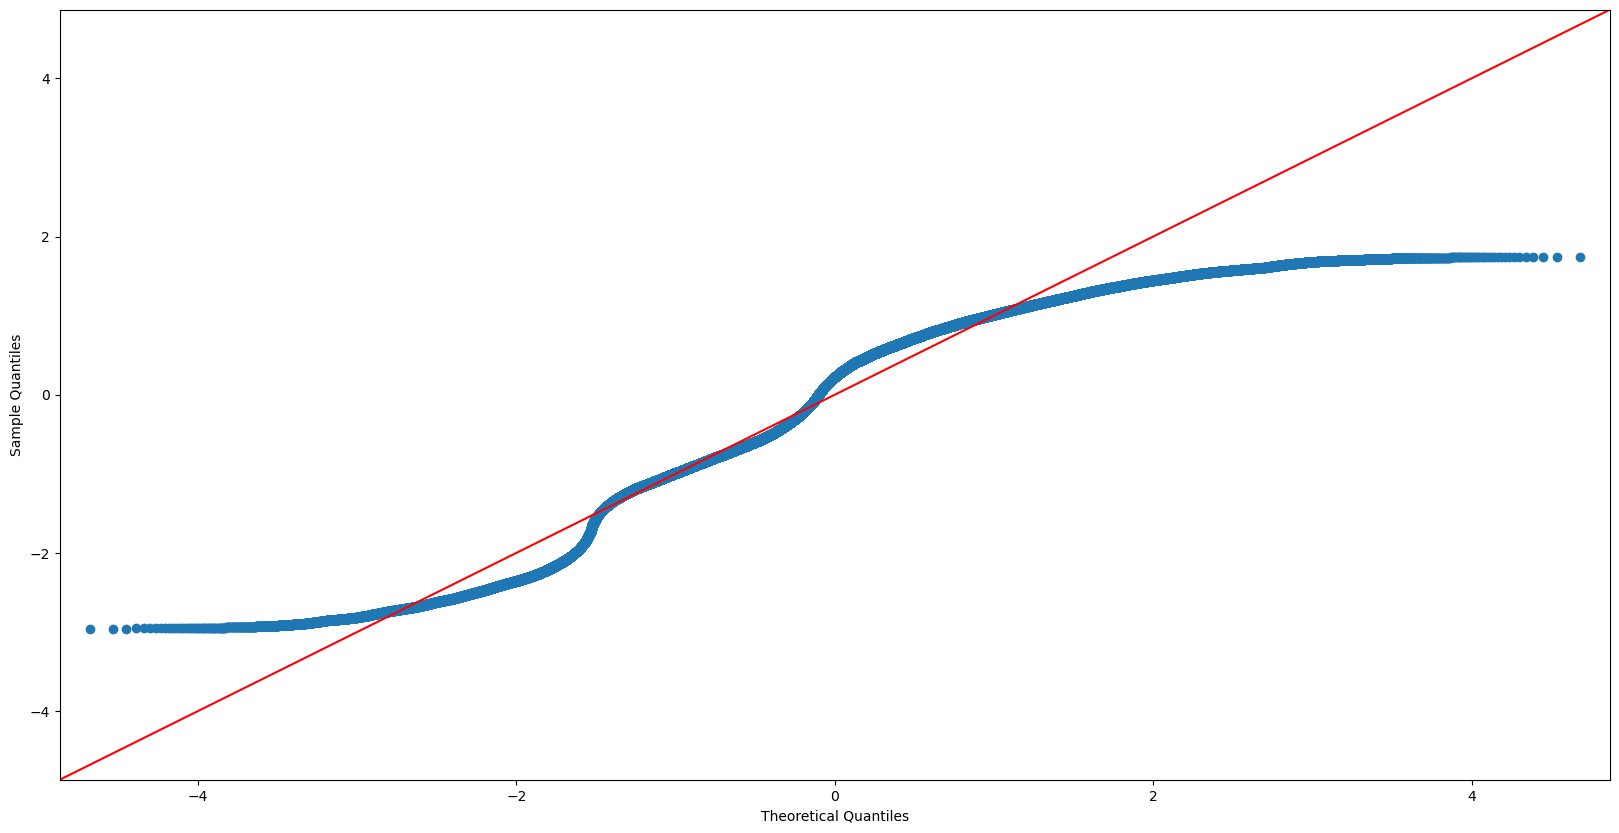

In [37]:
fig = sm.qqplot(sm1_model.resid, line='45', fit=True)

<h4>Adding dummy variables has improved the qq plot</h4>

# Checking for Heteroscedasticity

<h3>Using the White test.<br>
Null hyothesis: Homoscedasticity is present (residuals are equally scattered)<br>
Alternative hypothesis: Heteroscedasticity is present (residuals are not equally scattered)</h3><br>

In [38]:
from statsmodels.stats.diagnostic import het_white

In [39]:
white_test = het_white(sm1_model.resid,  sm1_model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 119306.4452207388, 'Test Statistic p-value': 0.0, 'F-Statistic': 1188.3759988873771, 'F-Test p-value': 0.0}


<h3>p-value is less than 0.05, we reject the null hypothesis. Heteroscedasticity is present.<br></h3>

# Log Transformation

In [40]:
log_transformer = FunctionTransformer(np.log, validate=True)

In [41]:
log_columns = ['bmi', 'age']

new_log_columns = ['log_bmi', 'log_age']

X_train_log = pd.DataFrame(log_transformer.fit_transform(X1_train[log_columns]), 
                           columns=new_log_columns, index=X1_train.index)

X2_train = pd.concat([X1_train.drop(log_columns, axis=1), X_train_log], axis=1)
X2_train.head()

,children,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,occupation_Student,occupation_Unemployed,occupation_White_collar,exercise_frequency_ord,coverage_level_ord,medical_history_ord,family_medical_history_ord,log_bmi,log_age
506532,1,1,1,1,0,0,0,0,1,0,0,3,0,3.174715,4.110874
327991,1,1,1,0,0,0,0,0,0,3,2,0,1,3.382694,3.828641
715937,1,1,0,0,0,0,0,0,1,0,2,1,3,3.636270,3.891820
860726,5,1,0,0,0,1,0,0,0,0,0,3,3,3.615233,3.828641
78617,0,1,1,0,0,1,0,0,1,0,0,3,3,3.613617,3.555348


In [42]:
# Log transform the test columns and convert them into a DataFrame 
X_test_log = pd.DataFrame(log_transformer.transform(X1_test[log_columns]), 
                          columns=new_log_columns, index=X1_test.index)

# Replace testing columns with transformed versions
X2_test = pd.concat([X1_test.drop(log_columns, axis=1), X_test_log], axis=1)

In [43]:
y2_train = y1_train
y2_test = y1_test

In [44]:
logmlr = lm.fit(X2_train, y2_train)

y2_hat_train = lm.predict(X2_train)
y2_hat_test = lm.predict(X2_test)

In [45]:
train_residuals = y2_hat_train - y2_train
test_residuals = y2_hat_test - y2_test

# Train/Test mean squared error log data

In [46]:
train2_mse = mean_squared_error(y2_train, y2_hat_train)
test2_mse = mean_squared_error(y2_test, y2_hat_test)
print('Train Mean Squared Error:', train2_mse)
print('Test Mean Squared Error:', test2_mse)

Train Mean Squared Error: 2261219.7409103005
Test Mean Squared Error: 2264208.159574257


In [48]:
X2const_train = sm.add_constant(X2_train)
sm2_ols = linear_model.OLS(y2_train, X2const_train) 
sm2_model = sm2_ols.fit()

<h3>Captured R-squared for log data</h3>

In [49]:
adjusted_r_squared = sm2_model.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

Adjusted R-squared: 0.884238459053467


<h4>This R2 has a minute improvement from the dummies R2</h4><br>

In [50]:
sm2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 3.565e+05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:58:32   Log-Likelihood:            -6.1143e+06
No. Observations:              700000   AIC:                         1.223e+07
Df Residuals:                  699984   BIC:                         1.223e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1772.5318     29.297    -60.503      0.000   -1829.952   -1715.111
children                     199.7146      1.053    189.700      0.000     197.651     201.778
smoker_yes                  5008.5344      3.595   1393.320      0.000    5001.489    5015.580
gender_male                 1000.0776      3.595    278.210      0.000     993.032    1007.123
region_northwest            -703.1098      5.082   -138.341      0.000    -713.071    -693.148
region_southeast            -499.3423      5.083    -98.234      0.000    -509.305    -489.379
region_southwest            -798.2487      5.081   -157.094      0.000    -808.208    -788.289
occupation_Student          -992.5797      5.083   -195.285      0.000   -1002.542    -982.618
occupation_Unemployed      -1487.7561      5.080   -292.876      0.000   -1497.712   -1477.800
occupation_White_collar      506.6261      5.087     99.600      0.000     496.656     516.596
exercise_frequency_ord       650.7562      1.608    404.730      0.000     647.605     653.908
coverage_level_ord          2500.4854      2.201   1136.117      0.000    2496.172    2504.799
medical_history_ord         1401.4199      1.606    872.586      0.000    1398.272    1404.568
family_medical_history_ord  1402.3497      1.608    872.333      0.000    1399.199    1405.500
log_bmi                     1599.9322      6.257    255.721      0.000    1587.670    1612.195
log_age                      748.0518      4.922    151.986      0.000     738.405     757.698
==============================================================================
Omnibus:                    39775.653   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42038.066
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                       2.608   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

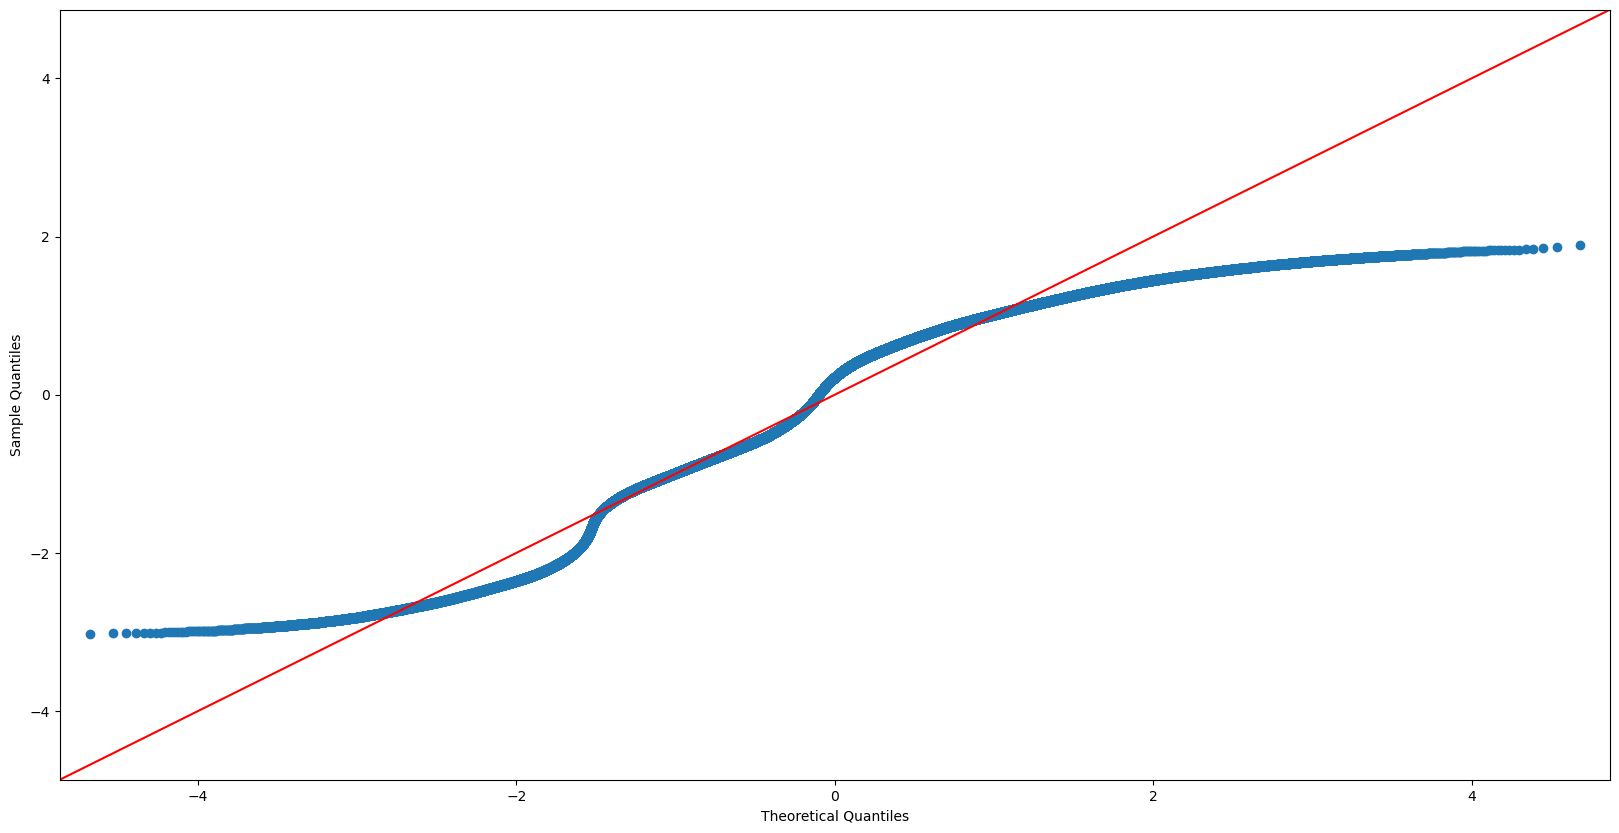

In [51]:
fig = sm.qqplot(sm2_model.resid, line='45', fit=True)

<h4>log transforming the continuous variables has altered the qq plot very little compared to the added dummies qq plot</h4>

# Creating a charges prediction calculator

In [52]:
y_pred = logmlr.predict(X2_test)

In [53]:
y_test1 = y2_test.values.tolist()

In [54]:
y_pred1 = y_pred.tolist()

In [55]:
charge = pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1})

In [56]:
charge.sample(1000)

,Actual,Predicted
173063,[13601.506129038293],[15206.069983897833]
74203,[23299.756661056286],[23835.472382305514]
282828,[22166.43413093424],[22568.89792199272]
20689,[13719.917668920889],[12998.318236045905]
265351,[12100.850772143946],[11072.351465407884]
...,...,...
120750,[7566.188138878903],[9560.381856239823]
156060,[14545.101778984204],[15634.592385046977]
49915,[18236.159455572],[17646.992233370453]
263676,[17815.6417117648],[19142.55443454035]


In [76]:
# new customer parameters are a female, 40yrs old, has 4 children, is a smoker, lives in the northwest region, is unemployed, rarely exercises
# has basic coverage, no medical or family medical history and a bmi of 40.30
data = {'children' : 4,
        'smoker_yes' : 1,
        'gender_male': 0,
        'region_northwest' : 1,
        'region_southeast': 0,
        'region_southwest': 0,
        'occupation_Student': 0,
        'occupation_Unemployed': 1,
        'occupation_White_collar': 0,
        'exercise_frequency_ord': 2,
        'coverage_level_ord': 1,
        'medical_history_ord': 0, 
        'family_medical_history_ord': 0,        
        'log_bmi' : 40.30,        
        'log_age' : 40
        }
df_pred = pd.DataFrame(data, index=[0])
df_pred

,children,smoker_yes,gender_male,region_northwest,region_southeast,region_southwest,occupation_Student,occupation_Unemployed,occupation_White_collar,exercise_frequency_ord,coverage_level_ord,medical_history_ord,family_medical_history_ord,log_bmi,log_age
0,4,1,0,1,0,0,0,1,0,2,1,0,0,40.3,40


In [77]:
new_pred1=logmlr.predict(df_pred)
print("Prediction cost for new customer=",new_pred1)

Prediction cost for new customer= [[100045.33235293]]
